<a href="https://colab.research.google.com/github/wonkwonlee/a2w-kma-big-data-contest/blob/main/XGBoost_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 경로 설정 
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import xgboost as xgb
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
%matplotlib inline

In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

pd.set_option('display.max_columns',1000)

In [ ]:
file = tf.keras.utils
raw_df = pd.read_csv("../A2W/데이터/data_submission/merge_final_real1.csv")

In [ ]:
raw_df

,tm,stnId,umd2,avgTa,minTa,maxTa,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,EIGHT_AGL,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT,landslide,1day_yn,2day_yn
0,2011-01-01,115,울릉군 울릉읍,0.8,-1.1,2.1,0.0,0.0,19.33,28.0,29.4,19.0,11.1,65.0,82.5,5.8,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
1,2011-01-02,115,울릉군 울릉읍,0.1,-0.9,1.3,0.0,0.0,22.83,24.8,14.5,8.5,6.0,65.0,91.5,29.7,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
2,2011-01-03,115,울릉군 울릉읍,-0.3,-1.4,0.8,0.0,0.0,12.83,7.5,15.9,10.2,6.5,61.0,80.3,0.3,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
3,2011-01-04,115,울릉군 울릉읍,1.7,0.4,3.9,0.0,0.0,0.00,0.0,11.2,6.8,3.1,53.0,63.1,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
4,2011-01-05,115,울릉군 울릉읍,1.2,-1.2,2.6,0.0,0.0,7.25,1.8,13.9,6.9,4.1,42.0,61.5,12.3,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093785,2019-12-27,295,남해군 창선면,3.3,-1.9,7.4,0.0,0.0,0.00,0.0,5.8,3.4,1.8,30.0,50.0,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093786,2019-12-28,295,남해군 창선면,2.2,-1.9,8.1,0.0,0.0,0.00,0.0,2.7,1.6,0.9,33.0,56.1,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093787,2019-12-29,295,남해군 창선면,3.2,-0.5,5.8,0.0,0.0,0.00,8.5,2.6,1.4,0.8,53.0,75.8,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0
2093788,2019-12-30,295,남해군 창선면,6.8,3.6,12.6,0.0,0.0,0.00,0.5,6.1,3.4,1.2,50.0,78.9,0.0,1,11,204.6,31.4,322.5,4,7,1,1,20,2,1,1.0,2.0,1.0,15.0,2.0,4.0,12.0,0.0,0.0,0.0


In [ ]:
raw_df.columns

Index(['tm', 'stnId', 'umd2', 'avgTa', 'minTa', 'maxTa', 'mi10MaxRn',
       'hr1MaxRn', 'sumRnDur', 'sumRn', 'maxInsWs', 'maxWs', 'avgWs', 'minRhm',
       'avgRhm', 'n99Rn', 'PRRCK_LARG', 'PRRCK_MDDL', 'LOCTN_ALTT',
       'LOCTN_GRDN', 'EIGHT_AGL', 'CLZN_CD', 'TPGRP_TPCD', 'PRDN_FOM_C',
       'SLANT_TYP', 'SLDPT_TPCD', 'SCSTX_CD', 'SLTP_CD', 'STORUNST', 'FROR_CD',
       'FRTP_CD', 'KOFTR_GROU', 'DMCLS_CD', 'AGCLS_CD', 'HEIGHT', 'landslide',
       '1day_yn', '2day_yn'],
      dtype='object')

In [ ]:
#분석을 위해 음수 값을 가지는 칼럼들을 제외하고 결측치를 0으로 대체한다.
select_df = raw_df[['PRRCK_LARG','PRRCK_MDDL','LOCTN_ALTT','LOCTN_GRDN','CLZN_CD','TPGRP_TPCD','PRDN_FOM_C','SLANT_TYP','SLANT_TYP','SLDPT_TPCD','SCSTX_CD','SLTP_CD','stnId','avgTa', 'minTa','STORUNST','FROR_CD','FRTP_CD','KOFTR_GROU','DMCLS_CD','AGCLS_CD','HEIGHT','mi10MaxRn','hr1MaxRn', 'sumRnDur', 'sumRn', 
       'maxInsWs', 'maxWs', 'avgWs', 'minRhm','avgRhm', 'n99Rn', 'landslide']]
cleaned_df = select_df.fillna(0)
cleaned_df.info()
cleaned_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093790 entries, 0 to 2093789
Data columns (total 33 columns):
 #   Column      Dtype  
---  ------      -----  
 0   PRRCK_LARG  int64  
 1   PRRCK_MDDL  int64  
 2   LOCTN_ALTT  float64
 3   LOCTN_GRDN  float64
 4   CLZN_CD     int64  
 5   TPGRP_TPCD  int64  
 6   PRDN_FOM_C  int64  
 7   SLANT_TYP   int64  
 8   SLANT_TYP   int64  
 9   SLDPT_TPCD  int64  
 10  SCSTX_CD    int64  
 11  SLTP_CD     int64  
 12  stnId       int64  
 13  avgTa       float64
 14  minTa       float64
 15  STORUNST    float64
 16  FROR_CD     float64
 17  FRTP_CD     float64
 18  KOFTR_GROU  float64
 19  DMCLS_CD    float64
 20  AGCLS_CD    float64
 21  HEIGHT      float64
 22  mi10MaxRn   float64
 23  hr1MaxRn    float64
 24  sumRnDur    float64
 25  sumRn       float64
 26  maxInsWs    float64
 27  maxWs       float64
 28  avgWs       float64
 29  minRhm      float64
 30  avgRhm      float64
 31  n99Rn       float64
 32  landslide   float64
dtypes: floa

,PRRCK_LARG,PRRCK_MDDL,LOCTN_ALTT,LOCTN_GRDN,CLZN_CD,TPGRP_TPCD,PRDN_FOM_C,SLANT_TYP,SLANT_TYP,SLDPT_TPCD,SCSTX_CD,SLTP_CD,stnId,avgTa,minTa,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT,mi10MaxRn,hr1MaxRn,sumRnDur,sumRn,maxInsWs,maxWs,avgWs,minRhm,avgRhm,n99Rn,landslide
0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,115,0.8,-1.1,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,19.33,28.0,29.4,19.0,11.1,65.0,82.5,5.8,0.0
1,0,0,0.0,0.0,0,0,0,0,0,0,0,0,115,0.1,-0.9,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,22.83,24.8,14.5,8.5,6.0,65.0,91.5,29.7,0.0
2,0,0,0.0,0.0,0,0,0,0,0,0,0,0,115,-0.3,-1.4,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,12.83,7.5,15.9,10.2,6.5,61.0,80.3,0.3,0.0
3,0,0,0.0,0.0,0,0,0,0,0,0,0,0,115,1.7,0.4,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,0.00,0.0,11.2,6.8,3.1,53.0,63.1,0.0,0.0
4,0,0,0.0,0.0,0,0,0,0,0,0,0,0,115,1.2,-1.2,1.0,2.0,2.0,30.0,1.0,5.0,16.0,0.0,0.0,7.25,1.8,13.9,6.9,4.1,42.0,61.5,12.3,0.0


In [ ]:
# 데이터 스플릿, 셔플링
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

#label(변수들), feature(landslide)를 np array 형태로 변환
train_labels = np.array(train_df.pop('landslide'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('landslide'))
test_labels = np.array(test_df.pop('landslide'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [ ]:
# sklearn StandardScaler를 사용하여 입력 기능을 정규화
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (1340025,)
Validation labels shape: (335007,)
Test labels shape: (418758,)
Training features shape: (1340025, 32)
Validation features shape: (335007, 32)
Test features shape: (418758, 32)


In [ ]:
# fit model no training data
model = xgb.XGBClassifier()
model.fit(train_features, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

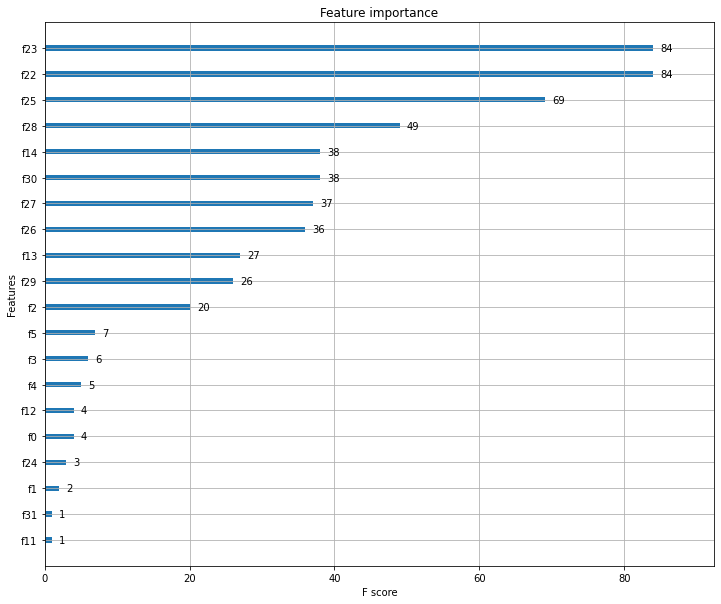

In [ ]:
plot_importance(model)

In [ ]:
# make predictions for test data
y_pred = model.predict(test_features)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
mean_squared_error(test_labels, y_pred)

0.00017432502782036404

In [ ]:
# accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.98%


In [ ]:
# final result
pred = model.predict(test)
submission['class'] = pred
submission.to_csv("submission.csv",index=False, encoding='utf-8-sig')

NameError: ignored